In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import precision_score, accuracy_score, f1_score
from tqdm import tqdm
import os
os.chdir("D:\\meridianthe4\\PML\\Cases")

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")

In [3]:
X, y = hr.drop("left", axis=1), hr["left"]
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
col_transformer = ColumnTransformer([("OHE", ohe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough', 
                                    verbose_feature_names_out=False)
col_transformer = col_transformer.set_output(transform="pandas")
X = col_transformer.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [6]:
depths = [None, 3, 4, 5, 6, 7]
min_samples = [0.01, 2, 10, 50, 100, 250]
min_leafs = [1, 10, 50, 100, 250]
scores = []
for depth in tqdm(depths):
    for min_sample in min_samples:
        for min_leaf in min_leafs:
            dtc = DecisionTreeClassifier(max_depth=depth, 
                                         min_samples_split=min_sample, 
                                         min_samples_leaf=min_leaf, 
                                         random_state=25)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score = precision_score(y_test, y_pred, pos_label=1)
            scores.append([depth, min_sample, min_leaf, score])
df_scores = pd.DataFrame(scores, columns=["max_depth", "min_samples_split", "min_samples_leaf", "score"])
df_scores.sort_values("score", ascending=False)

100%|██████████| 6/6 [00:03<00:00,  1.94it/s]


,max_depth,min_samples_split,min_samples_leaf,score
25,NaN,250.00,1,0.997056
0,NaN,0.01,1,0.996078
20,NaN,100.00,1,0.996078
165,7.0,50.00,1,0.994152
150,7.0,0.01,1,0.994141
...,...,...,...,...
34,3.0,0.01,250,0.852473
49,3.0,50.00,250,0.852473
44,3.0,10.00,250,0.852473
54,3.0,100.00,250,0.852473


### Examining The Best Tree

In [7]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=None, min_samples_split=0.01, min_samples_leaf=1)
best_tree.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_tree.feature_importances_})
df_imp = df_imp.sort_values("importance")

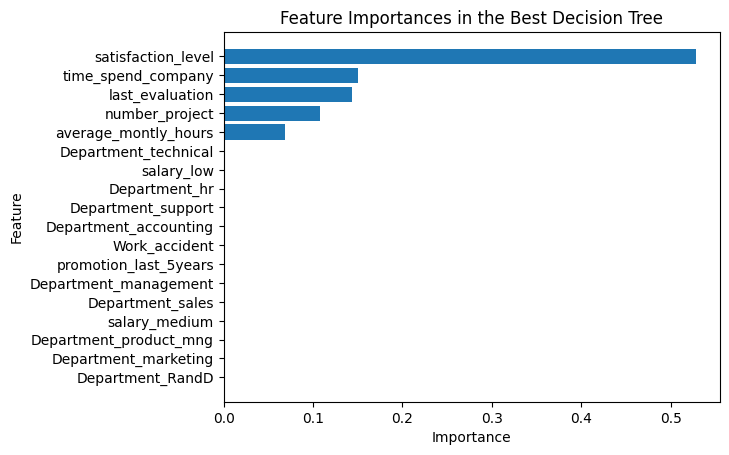

In [8]:
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in the Best Decision Tree")
plt.show()

## Glass Identification

In [61]:
os.chdir("D:\\meridianthe4\\PML\\Cases\\Glass_Identification")

In [63]:
glass = pd.read_csv("Glass.csv")

In [64]:
X, y = glass.drop("Type", axis=1), glass["Type"]
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
col_transformer = ColumnTransformer([("OHE", ohe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough', 
                                    verbose_feature_names_out=False)
col_transformer = col_transformer.set_output(transform="pandas")
X = col_transformer.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [66]:
depths = [None, 3, 4, 5, 6, 7]
min_samples = [0.01, 0.025, 0.05, 0.1, 2, 10]
min_leafs = [1, 10, 0.025, 0.01, 0.05, 0.1]
scores = []
for depth in tqdm(depths):
    for min_sample in min_samples:
        for min_leaf in min_leafs:
            dtc = DecisionTreeClassifier(max_depth=depth, 
                                         min_samples_split=min_sample, 
                                         min_samples_leaf=min_leaf, 
                                         random_state=25)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            score = f1_score(y_test, y_pred, average='macro')
            scores.append([depth, min_sample, min_leaf, score])
df_scores = pd.DataFrame(scores, columns=["max_depth", "min_samples_split", "min_samples_leaf", "score"])
df_scores.sort_values("score", ascending=False)

100%|██████████| 6/6 [00:00<00:00,  6.39it/s]


,max_depth,min_samples_split,min_samples_leaf,score
30,NaN,10.000,1.00,0.708406
156,6.0,0.050,1.00,0.699943
138,5.0,10.000,1.00,0.676701
141,5.0,10.000,0.01,0.676701
159,6.0,0.050,0.01,0.672555
...,...,...,...,...
191,7.0,0.025,0.10,0.464236
197,7.0,0.050,0.10,0.464236
203,7.0,0.100,0.10,0.464236
209,7.0,2.000,0.10,0.464236


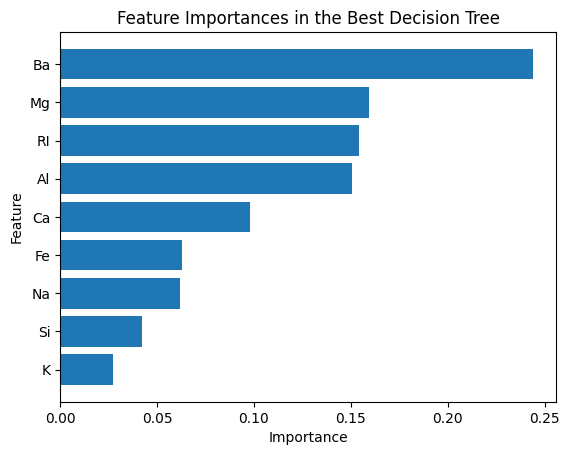

In [67]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=6, min_samples_split=0.025, min_samples_leaf=0.01)
best_tree.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_tree.feature_importances_})
df_imp = df_imp.sort_values("importance")
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in the Best Decision Tree")
plt.show()